In [4]:
import cv2 as cv

In [5]:
detector = cv.ORB_create()

In [6]:
matcher = cv.BFMatcher(crossCheck=True)

In [7]:
from pymongo import MongoClient; cli = MongoClient('192.168.0.16', 27017); db = cli['nephos']; images = db['images']

In [8]:
from base64 import b64decode; import numpy as np

In [32]:
imDocs = images.find({}).limit(5).sort("date", -1)

In [33]:
imDocs.count(True)

5

In [29]:
def loadImage(cursor):
	result = cursor.next()

	if result.get("image64") is not None:
		img = b64decode(result['image64'])
		npimg = np.fromstring(img, dtype=np.uint8) 
		cvImage = cv.imdecode(npimg, 1)
		print(result['date'], result['type'], result['_id'])
		return cvImage
	else:
		return None

In [34]:
im1 = loadImage(imDocs)

1486644300.0 avn 58b3a14444a7e0289931cc20


In [35]:
im2 = loadImage(imDocs)

1486642500.0 avn 58b3a14444a7e0289931cc15


In [14]:
import matplotlib.pyplot as plt

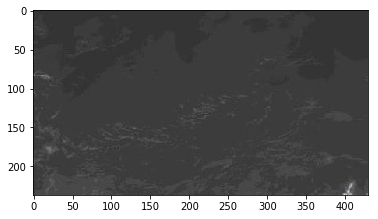

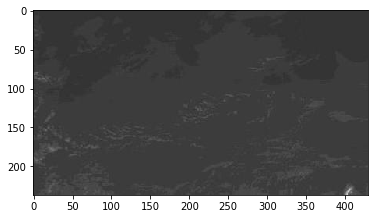

In [36]:
plt.imshow(im1); plt.show(); plt.imshow(im2); plt.show()

In [37]:
# Getting matches

In [38]:
(kp1, des1) = detector.detectAndCompute(im1, None)

In [39]:
(kp2, des2) = detector.detectAndCompute(im2, None)

In [41]:
matches = matcher.match(des1, des2)

In [54]:
gray1 = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)

In [55]:
im1Kp = cv.drawKeypoints(gray1, kp1, im1)

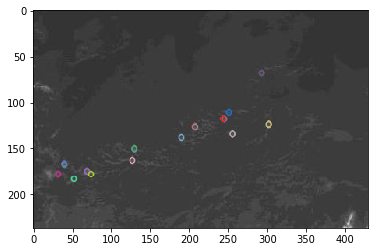

In [70]:
plt.imshow(im1Kp, aspect='auto'); plt.show()

In [57]:
gray2 = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

In [58]:
im2Kp = cv.drawKeypoints(gray2, kp2, im2)

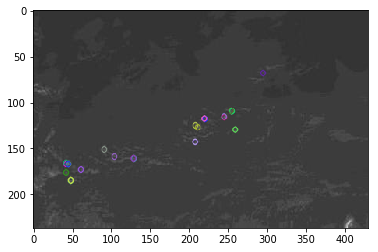

In [69]:
plt.imshow(im2Kp, aspect='auto'); plt.show()

In [65]:
matchesIm = cv.drawMatches(im1, kp1, im2, kp2, matches, None)

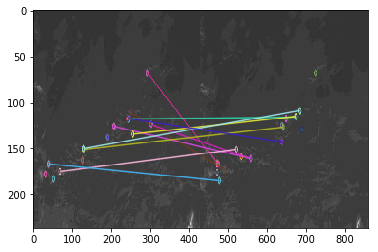

In [68]:
plt.imshow(matchesIm, aspect='auto'); plt.show()

In [67]:
plt.imshow?

In [73]:
match = matches[0]

In [76]:
match.distance

403.0905456542969

In [77]:
match.imgIdx

0

In [78]:
match.queryIdx

0

In [79]:
match.trainIdx

9